# Panda Sales Analysis

Objective
-what is the overall sales trend?
-what are the top 10 products by sales?
-what are the most selling products?
-what is the most preferred ship mode?
-what are the most profitable category and sub-category?
-Monthly Sales Comparison?
-Total Sales Revenue?m

step -1  importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step - 2 import dataset

In [6]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_excel('Global-Superstore.xlsx')

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [12]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [13]:
df = df.drop('Postal Code', axis=1)

In [14]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [15]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375915
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804


EDA

Total Sales Revenue

In [17]:
# Calculate total sales revenue
total_Revenue = df['Sales'].sum()

# Output the total revenue
print("Total Revenue:", total_Revenue)


Total Revenue: 12642501.909880001


In [18]:
df['Order Date'].min()

Timestamp('2011-01-01 00:00:00')

In [19]:
df['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

In [28]:
# Ensure 'Order Date' is in datetime format (if not already)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'month_year' column for grouping
df['month_year'] = df['Order Date'].dt.to_period('M')  # This gives 'YYYY-MM' format


In [30]:
df['month_year']

0        2012-07
1        2013-02
2        2013-10
3        2013-01
4        2013-11
          ...   
51285    2014-06
51286    2014-06
51287    2013-12
51288    2012-02
51289    2012-05
Name: month_year, Length: 51290, dtype: period[M]

In [39]:
df['month_year'] = df['Order Date'].dt.to_period('M')


In [40]:
df['month_year']

0        2012-07
1        2013-02
2        2013-10
3        2013-01
4        2013-11
          ...   
51285    2014-06
51286    2014-06
51287    2013-12
51288    2012-02
51289    2012-05
Name: month_year, Length: 51290, dtype: period[M]

In [43]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'month_year' column by extracting year and month from 'Order Date'
df['month_year'] = df['Order Date'].dt.to_period('M')

# Group by 'month_year' and sum only the 'Sales' column
df_trend = df.groupby('month_year')['Sales'].sum().reset_index()

# Convert 'month_year' back to string for better readability in plots
df_trend['month_year'] = df_trend['month_year'].astype(str)

# Display the resulting dataframe
df_trend.head()


,month_year,Sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


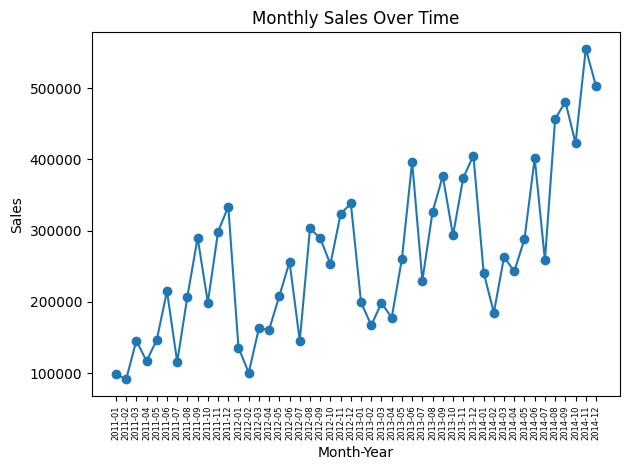

In [51]:
# Plotting monthly sales trend
plt.plot(df_trend['month_year'], df_trend['Sales'], marker='o')  # Added markers for better visibility
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')


# Rotate x-axis labels for better readability
plt.xticks(rotation=90, size=6)

# Display the plot
plt.tight_layout()  # Ensure the layout fits well
plt.show()


2.Product sale top 10

In [57]:
# Group by 'Product Name' and sum the 'Sales'
product_sales = pd.DataFrame(df.groupby('Product Name')['Sales'].sum()).reset_index()

# Sort the sales data in descending order for better analysis
product_sales = product_sales.sort_values(by='Sales', ascending=False)

# Display the top rows of product sales data
product_sales.head(10)


,Product Name,Sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


In [63]:
# Add a rank column to the DataFrame
product_sales['Rank'] = product_sales['Sales'].rank(ascending=False)

# Sort by rank to see the ranked order
product_sales = product_sales.sort_values(by='Rank')

# Display the top rows of the DataFrame with ranks
print(product_sales.head(10))


                                           Product Name       Sales  Rank
310                        Apple Smart Phone, Full Size  86935.7786   1.0
970                        Cisco Smart Phone, Full Size  76441.5306   2.0
2415                    Motorola Smart Phone, Full Size  73156.3030   3.0
2501                       Nokia Smart Phone, Full Size  71904.5555   4.0
866               Canon imageCLASS 2200 Advanced Copier  61599.8240   5.0
1837         Hon Executive Leather Armchair, Adjustable  58193.4841   6.0
2631  Office Star Executive Leather Armchair, Adjust...  50661.6840   7.0
1714  Harbour Creations Executive Leather Armchair, ...  50121.5160   8.0
2988                      Samsung Smart Phone, Cordless  48653.4600   9.0
2502                  Nokia Smart Phone, with Caller ID  47877.7857  10.0


3.Most selling product

In [67]:
most_selling_product =pd.DataFrame(df.groupby('Product Name')['Quantity'].sum()).reset_index()
print(most_selling_product)
orderby = most_selling_product.sort_values(by='Quantity',ascending=False)
print(orderby.head(10))

                                           Product Name  Quantity
0     "While you Were Out" Message Book, One Form pe...         8
1              #10 Gummed Flap White Envelopes, 100/Box        11
2                         #10 Self-Seal White Envelopes        10
3            #10 White Business Envelopes,4 1/8 x 9 1/2        32
4               #10- 4 1/8" x 9 1/2" Recycled Envelopes        37
...                                                 ...       ...
3783  iKross Bluetooth Portable Keyboard + Cell Phon...        24
3784                         iOttie HLCRIO102 Car Mount        12
3785                                iOttie XL Car Mount        14
3786  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...        29
3787                 netTALK DUO VoIP Telephone Service        26

[3788 rows x 2 columns]
                               Product Name  Quantity
3275                                Staples       876
894               Cardinal Index Tab, Clear       337
1210          Eldon F

4.Most preferred shipping mode

C:\Users\Saran\AppData\Local\Temp\ipykernel_21172\2933375554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ship Mode', palette='Set2')


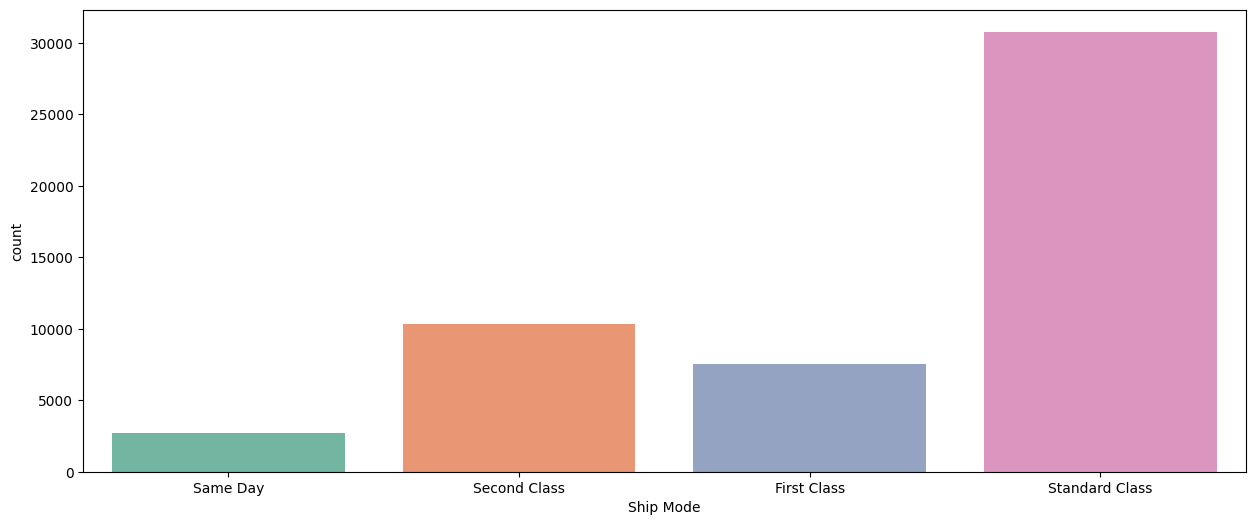

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15,6))

# Create the countplot with a built-in palette
sns.countplot(data=df, x='Ship Mode', palette='Set2')

# Show the plot
plt.show()


5.which is most profitable category by sub category

In [79]:

# Group by 'Category' and 'Sub-Category', then sum 'Profit'
aggregated_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Create a DataFrame from the aggregated data
most = pd.DataFrame(aggregated_profit)

# Display the DataFrame
most.sort_values(['Category','Profit'],ascending=False)


,Category,Sub-Category,Profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630
